In [4]:
# read all csv files in out folder
# For each file, read the csv file and place the value in the corresponding row

import os
import pandas as pd

# Define the folder path
folder_path = 'out'

# Define the column names
columns = ["Load R1CS", "Load Witness", "Setup", "Prover", "Verifier"]

# Create an empty dataframe with the defined column names
df = pd.DataFrame(columns=columns)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the csv file
        file_path = os.path.join(folder_path, filename)
        temp_df = pd.read_csv(file_path, header=None)

        column = filename.split('-')[0]
        # find the number right before "exec" in the filename
        row = int(filename.split('exec')[0][-1])

        if column == "Load R1CS" or column == "Load Witness":
            value = temp_df.iloc[-1,0]
        else:
            value = temp_df.iloc[-1,1]
        # Place the values
        df.loc[row, column] = value

df["Prover Total"] = df["Load R1CS"] + df["Load Witness"] + + df["Setup"] + df["Prover"]
print(df)

  Load R1CS Load Witness      Setup     Prover  Verifier Prover Total
1  3.112253     0.614075  21.553224  10.503581  0.115776    35.783134
2   3.90254     0.690555  18.111232   7.621881  0.092616    30.326208
3   5.28367      0.91639  13.632668   7.033419  0.100308    26.866147
4  5.686758     0.726231  13.780084   6.665269  0.106161    26.858342
5  6.637837     0.645787  17.664385    8.13322  0.115886    33.081229
6  8.711266     0.615713  16.608535   8.025589   0.12436    33.961104


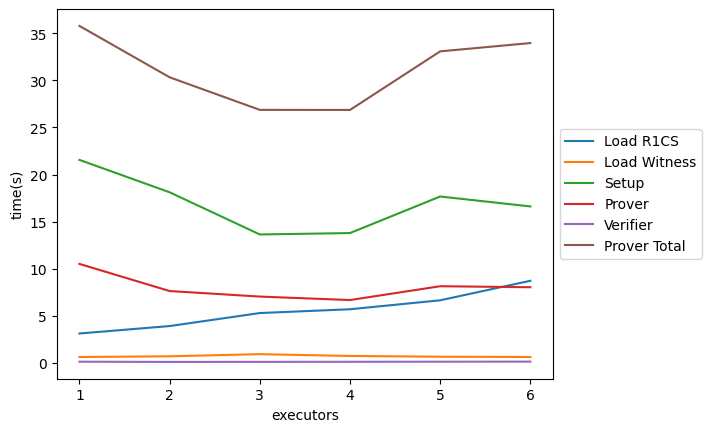

In [5]:
import matplotlib.pyplot as plt
df.index.name = 'executors'
# only integer number is allowed in xticks
ax = df.plot()
ax.locator_params(integer=True)
ax.set_ylabel("time(s)")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()